In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading DataFrame from cleaned-up .csv file from 6 weeks of mta turnstile data from 2019
# The csv file should only contain the 10 stations we filtered by other methods
mta = pd.read_csv('stations_final.csv', parse_dates=['date', 'timestamp'], low_memory=False)

In [3]:
# Grouping by station and weekday to get total rider per station, per weekday
# Since the data is from 6 weeks, preemptively creating a column 'total_div_6'
# This means that the sum would be an average value per weekday over 6 weeks
mta['total_div_6'] = mta['total'] / 6
group_station_day = mta.groupby(['station','weekday'])['total_div_6'].sum()

Text(0.5, 335.24999999999994, '')

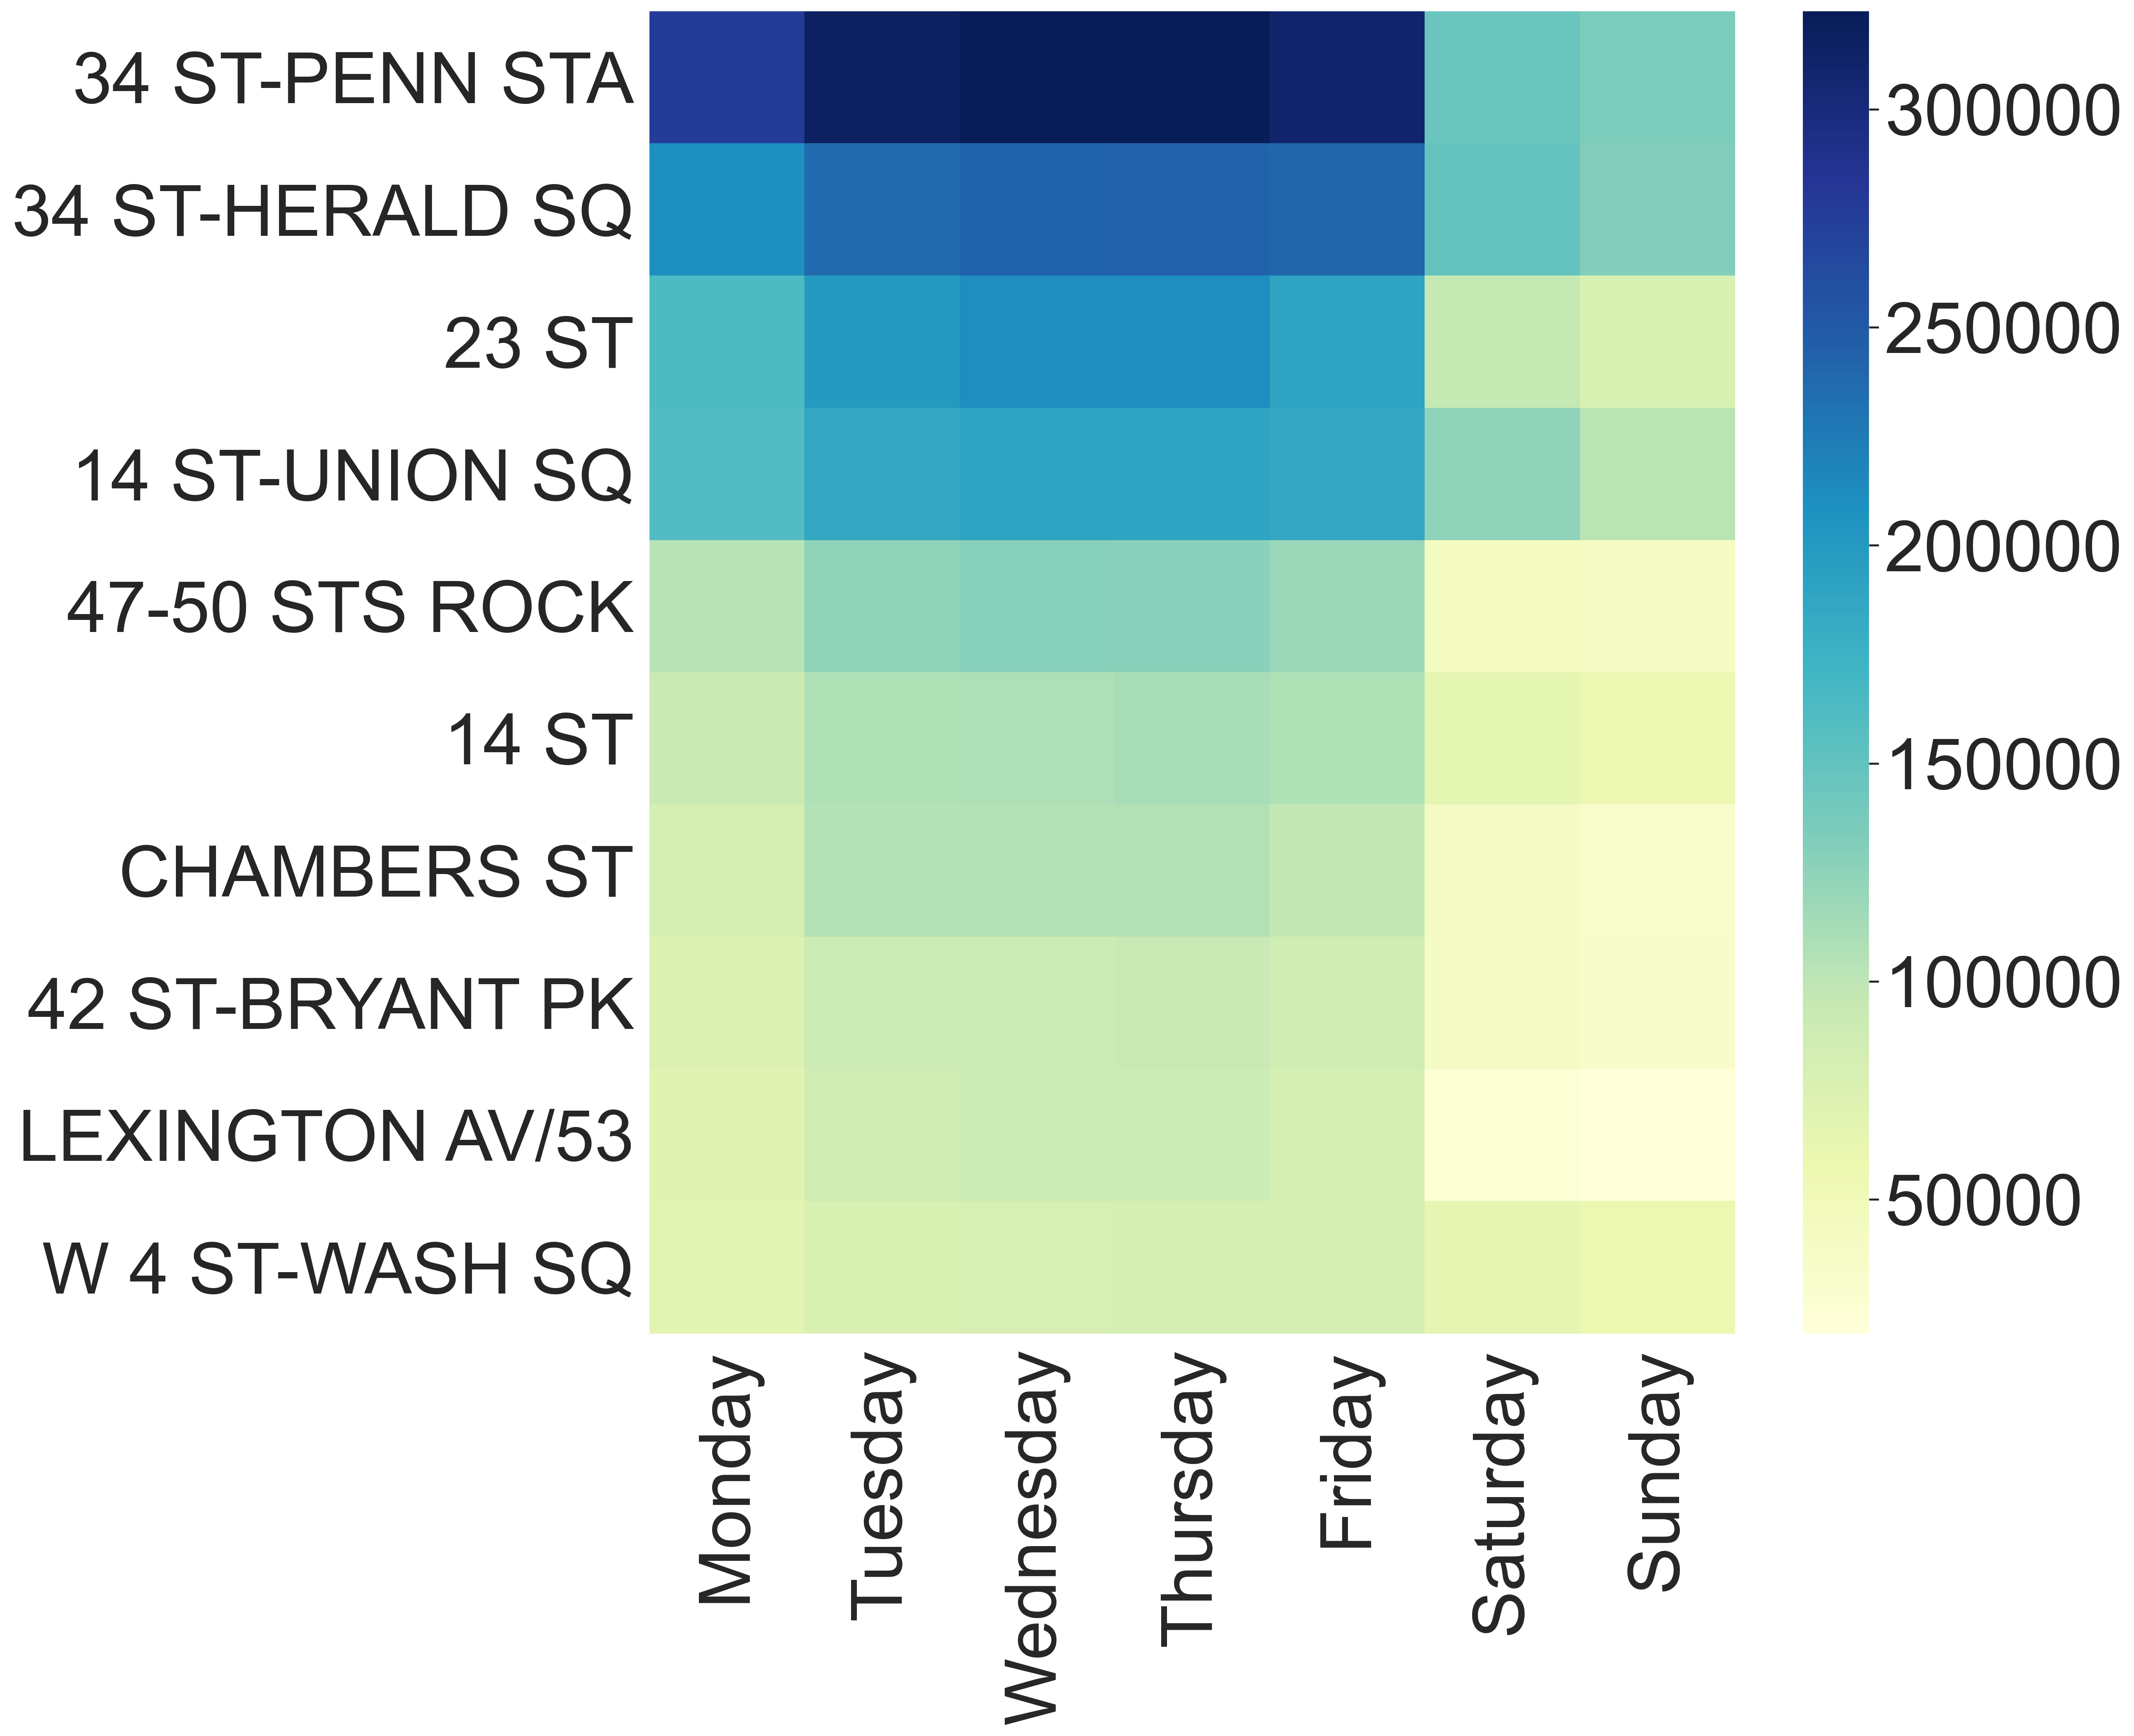

In [5]:
sns.set(font_scale = 4) # increasing font size

# rearrange data_frame to have days of the weeks on one axis and stations on the other
matrix_station_day = group_station_day.unstack()
matrix_station_day.reset_index()
matrix_station_day = matrix_station_day.reindex(columns=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
matrix_station_day = matrix_station_day.reindex(index=['14 ST', '14 ST-UNION SQ', '23 ST', '34 ST-HERALD SQ',
       '34 ST-PENN STA', '42 ST-BRYANT PK', '47-50 STS ROCK',
       'CHAMBERS ST', 'LEXINGTON AV/53', 'W 4 ST-WASH SQ'])
matrix_station_day.sort_values(by='Monday',ascending=False,inplace=True)

# plotting using Matplotlib subplots and Seaborn. Getting rid of x and y labels
fig, ax = plt.subplots(1, 1, figsize = (15, 15), dpi=300)
sns.heatmap(matrix_station_day,cmap='YlGnBu');
ax.set_ylabel('')    
ax.set_xlabel('')